Dataset is available at https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

In [1]:
import pandas as pd
import numpy as np
import warnings
pd.options.display.max_columns = None

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('diabetic_data.csv')

# Understanding and Cleaning Data

In [3]:
df.sample(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
65042,181140618,24374268,AfricanAmerican,Male,[60-70),?,1,1,7,3,BC,InternalMedicine,50,1,18,0,0,2,428,425,V65,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
62190,173367012,111455802,Caucasian,Male,[60-70),?,2,1,7,3,SP,Emergency/Trauma,61,1,12,0,0,0,786,189,585,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
47511,145988388,57864780,Caucasian,Female,[80-90),?,2,6,6,4,MC,?,50,0,8,0,0,0,998,41,V09,7,NaN,NaN,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
86141,273638574,109327644,AfricanAmerican,Female,[30-40),?,2,1,7,5,BC,Emergency/Trauma,42,1,5,0,0,0,340,250,564,3,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
57120,163313532,34698339,Caucasian,Female,[60-70),?,3,1,1,3,SP,InternalMedicine,33,1,8,0,0,0,577,576,250,5,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df_cat = df.select_dtypes(include=object)
df_num = df.select_dtypes(include='number')

print(list(df_cat.columns))
print("Number of Categorical columns: ",len(df_cat.columns))
print(list(df_num.columns))
print("Number of Categorical columns: ",len(df_num.columns))



['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
Number of Categorical columns:  37
['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
Number of Categorical columns:  13


In [6]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [7]:
for colums in df_cat.columns:
    print(colums, df_cat[colums][df_cat[colums] == '?'].count() / df_cat[colums].count() * 100)

race 2.2335554114340743
gender 0.0
age 0.0
weight 96.85847925633315
payer_code 39.5574160328597
medical_specialty 49.08220820313268
diag_1 0.02063557573256294
diag_2 0.3517874339170253
diag_3 1.398305917497003
max_glu_serum 0.0
A1Cresult 0.0
metformin 0.0
repaglinide 0.0
nateglinide 0.0
chlorpropamide 0.0
glimepiride 0.0
acetohexamide 0.0
glipizide 0.0
glyburide 0.0
tolbutamide 0.0
pioglitazone 0.0
rosiglitazone 0.0
acarbose 0.0
miglitol 0.0
troglitazone 0.0
tolazamide 0.0
examide 0.0
citoglipton 0.0
insulin 0.0
glyburide-metformin 0.0
glipizide-metformin 0.0
glimepiride-pioglitazone 0.0
metformin-rosiglitazone 0.0
metformin-pioglitazone 0.0
change 0.0
diabetesMed 0.0
readmitted 0.0


These Colums contains "?" following percentage
- weight --> 96.85 %
- payer_code --> 39.55 % 
- medical_specialty --> 49.08 % 

So, these columns can be removed.

In [8]:
df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

In [9]:
df['encounter_id'].nunique()

101766

This means for each entry of patient, an encounter ID is generated

In [10]:
df['patient_nbr'].nunique()

71518

Each Patient is assigned a unique ID, and data show that patient's entry is more than once.

These ID, don't provide information other than this , so for other annalysis these can be dropped.

In [11]:
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

In [12]:
df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [13]:
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [14]:
df = df.replace('?', np.nan)

In [15]:
df['race'] = df['race'].fillna(df['race'].mode()[0])

In [16]:
for colums in df.select_dtypes(include=object).columns:
    print(df[colums].value_counts(dropna=False))

race
Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64
diag_1
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
373       1
314       1
684       1
217       1
V51       1
Name: count, Length: 717, dtype: int64
diag_2
276     6752
428     6662
250     6071
427     5036
401     3736
        ... 
E918       1
46         1
V13        1
E850       1
927        1
Name: count, Length: 749, dtype: int64
diag_3
250     11555
401      8289
276      5175
428      4577
427      3955
        ...  
657         1
684         1
603         1
E826        1
971         

In [17]:
df['gender'].replace('Unknown/Invalid', np.nan, inplace=True)

In [18]:
df['gender'].value_counts(dropna=False)

gender
Female    54708
Male      47055
NaN           3
Name: count, dtype: int64

In [19]:
df.drop(df[df['gender'].isna()].index, inplace = True)
df.reset_index(drop=True, inplace=True)

In [20]:
df.isnull().sum()

race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96417
A1Cresult                   84745
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101763 non-null  object
 1   gender                    101763 non-null  object
 2   age                       101763 non-null  object
 3   admission_type_id         101763 non-null  int64 
 4   discharge_disposition_id  101763 non-null  int64 
 5   admission_source_id       101763 non-null  int64 
 6   time_in_hospital          101763 non-null  int64 
 7   num_lab_procedures        101763 non-null  int64 
 8   num_procedures            101763 non-null  int64 
 9   num_medications           101763 non-null  int64 
 10  number_outpatient         101763 non-null  int64 
 11  number_emergency          101763 non-null  int64 
 12  number_inpatient          101763 non-null  int64 
 13  diag_1                    101742 non-null  object
 14  diag

In [22]:
df['max_glu_serum'].value_counts(dropna=False)

max_glu_serum
NaN     96417
Norm     2597
>200     1485
>300     1264
Name: count, dtype: int64

In [23]:
df['A1Cresult'].value_counts(dropna=False)

A1Cresult
NaN     84745
>8       8216
Norm     4990
>7       3812
Name: count, dtype: int64

In [24]:
df.replace({'max_glu_serum': {'None': 0, 'Norm': 1, '>200': 2, '>300': 2}}, inplace=True)
df.replace({'A1Cresult': {'None': 0, 'Norm': 1, '>7': 2, '>8': 2}}, inplace=True)

In [25]:
df.fillna({'max_glu_serum': 0, 'A1Cresult': 0}, inplace=True)

In [26]:
print(df['max_glu_serum'].value_counts(dropna=False))
print(df['A1Cresult'].value_counts(dropna=False))

max_glu_serum
0.0    96417
2.0     2749
1.0     2597
Name: count, dtype: int64
A1Cresult
0.0    84745
2.0    12028
1.0     4990
Name: count, dtype: int64


In [27]:
df['age'].value_counts()

age
[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

In [28]:
df.replace({'age': {'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95}}, inplace=True)

In [29]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']
df['procedures'] = df['num_lab_procedures'] + df['num_procedures']

In [30]:
df.drop(['number_outpatient', 'number_emergency', 'number_inpatient'], axis=1, inplace=True)
df.drop(['num_lab_procedures', 'num_procedures'], axis=1, inplace=True)

In [31]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization,procedures
0,Caucasian,Female,5,6,25,1,1,1,250.83,NaN,NaN,1,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,41
1,Caucasian,Female,15,1,1,7,3,18,276,250.01,255,9,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,0,59
2,AfricanAmerican,Female,25,1,1,7,2,13,648,250,V27,6,0.0,0.0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,3,16
3,Caucasian,Male,35,1,1,7,2,16,8,250.43,403,7,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0,45
4,Caucasian,Male,45,1,1,7,1,8,197,157,250,5,0.0,0.0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,AfricanAmerican,Male,75,1,3,7,3,16,250.13,291,458,9,0.0,2.0,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,0,51
101759,AfricanAmerican,Female,85,1,4,5,5,18,560,276,787,9,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,1,36
101760,Caucasian,Male,75,1,1,7,1,9,38,590,296,13,0.0,0.0,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,1,53
101761,Caucasian,Female,85,2,3,7,10,21,996,285,998,9,0.0,0.0,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,1,47


In [32]:
ids_map = pd.read_csv('IDS_mapping.csv')

In [33]:
ids_map_discharge = ids_map.from_records(ids_map.iloc[10:40,:])
ids_map_discharge.columns = ['discharge_disposition_id', 'description']

In [34]:
ids_map_discharge.map = ids_map_discharge.set_index('discharge_disposition_id')['description'].to_dict()

In [35]:
ids_map_discharge.map

{'1': 'Discharged to home',
 '2': 'Discharged/transferred to another short term hospital',
 '3': 'Discharged/transferred to SNF',
 '4': 'Discharged/transferred to ICF',
 '5': 'Discharged/transferred to another type of inpatient care institution',
 '6': 'Discharged/transferred to home with home health service',
 '7': 'Left AMA',
 '8': 'Discharged/transferred to home under care of Home IV provider',
 '9': 'Admitted as an inpatient to this hospital',
 '10': 'Neonate discharged to another hospital for neonatal aftercare',
 '11': 'Expired',
 '12': 'Still patient or expected to return for outpatient services',
 '13': 'Hospice / home',
 '14': 'Hospice / medical facility',
 '15': 'Discharged/transferred within this institution to Medicare approved swing bed',
 '16': 'Discharged/transferred/referred another institution for outpatient services',
 '17': 'Discharged/transferred/referred to this institution for outpatient services',
 '18': nan,
 '19': 'Expired at home. Medicaid only, hospice.',
 '2

In [36]:
ids_map_admission_source = ids_map.from_records(ids_map.iloc[42:67,:]).reset_index(drop=True)
ids_map_admission_source.columns = ['admission_source_id', 'description']

In [37]:
ids_map_admission_source

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


In [38]:
ids_map = ids_map.head(8)

In [39]:
ids_map

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [40]:
new_map = {1: 'Emergency',
 2: 'Emergency',
 3: 'Elective',
 4: 'Newborn',
 5: 'Not Available',
 6: 'Not Available',
 7: 'Emergency',
 8: 'Not Available'}

In [41]:
df['admission_type_id'] = df['admission_type_id'].map(new_map)

In [42]:
df['admission_type_id'].value_counts(dropna=False)

admission_type_id
Emergency        72489
Elective         18868
Not Available    10396
Newborn             10
Name: count, dtype: int64

In [43]:
df.drop(["diag_1", "diag_2", "diag_3"], axis=1, inplace=True)

In [44]:
df.replace({'readmitted': {'>30': "Yes", '<30': "Yes"}}, inplace=True)

df['readmitted'].value_counts()

readmitted
NO     54861
Yes    46902
Name: count, dtype: int64

In [45]:
df_copy = df.copy()

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df_cat = df.select_dtypes(include=object)

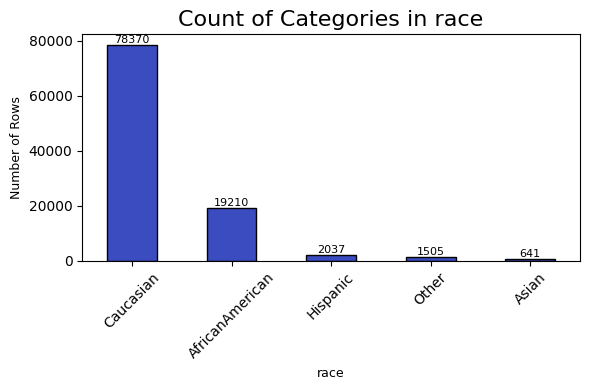

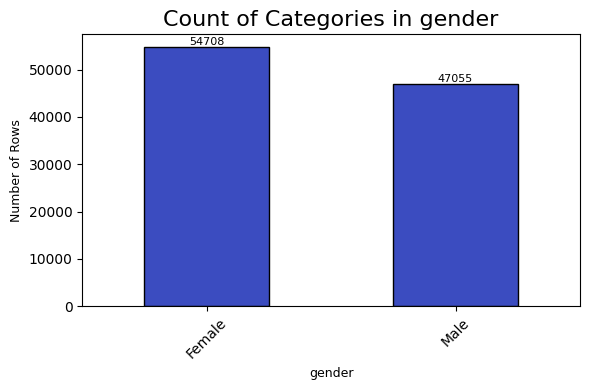

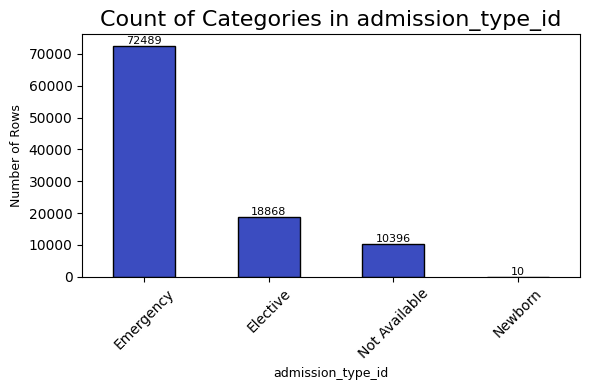

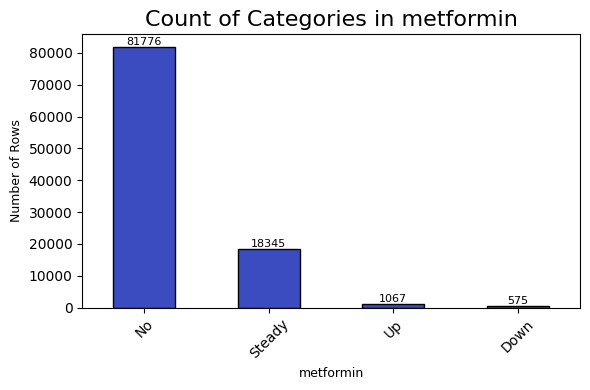

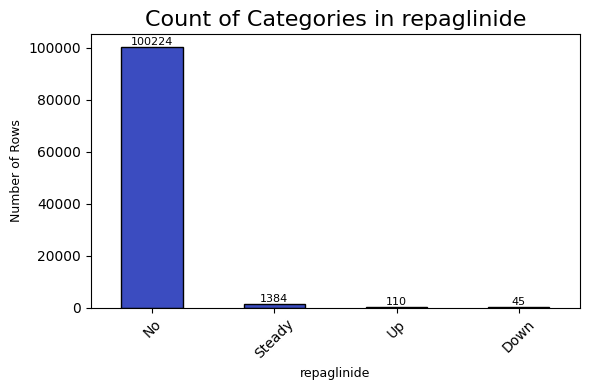

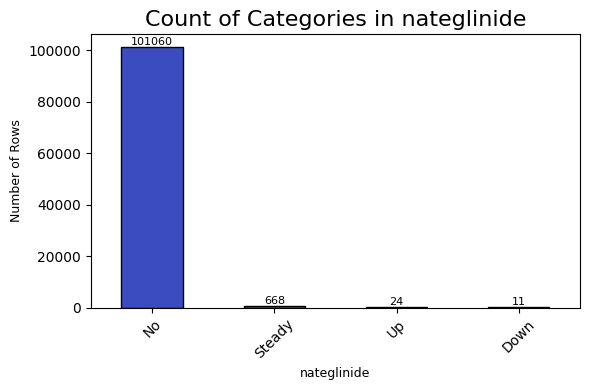

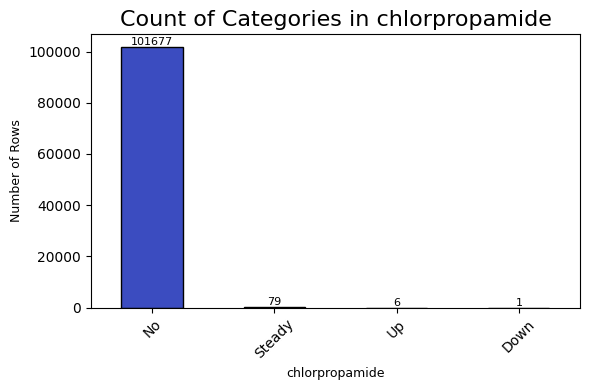

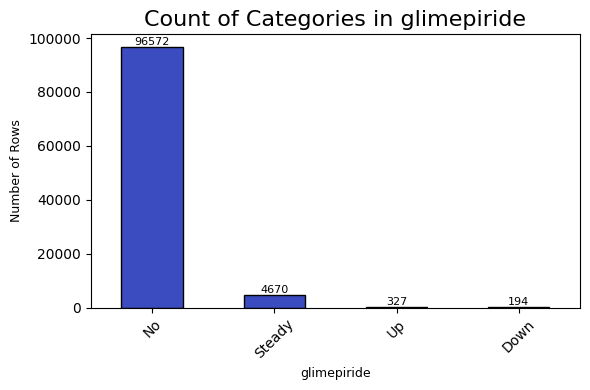

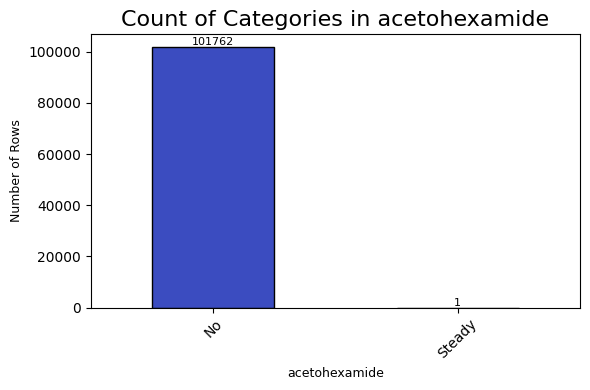

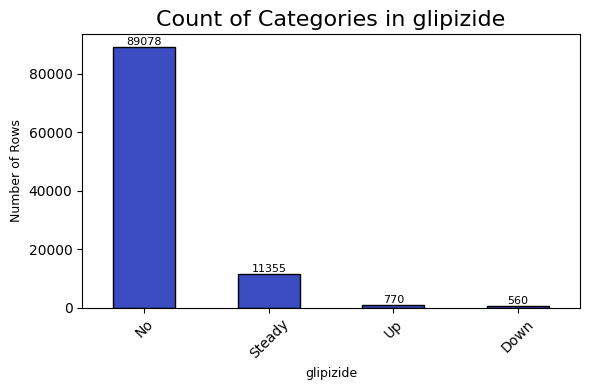

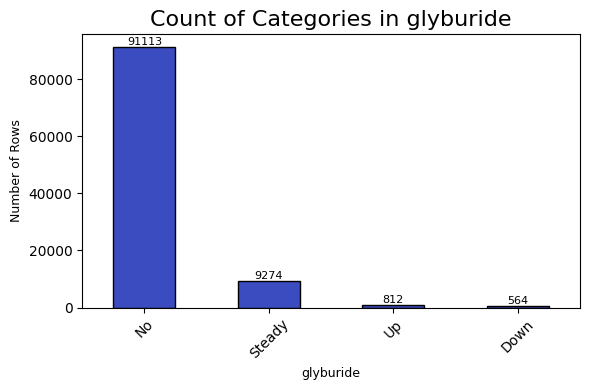

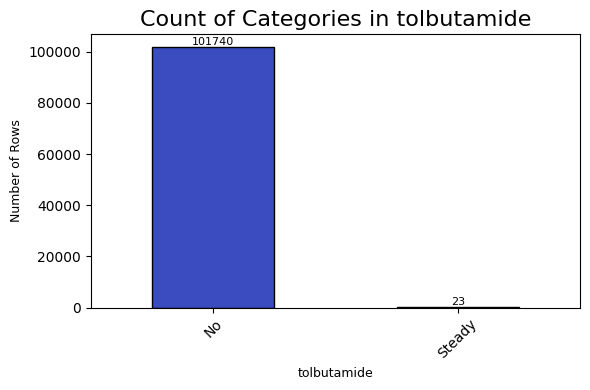

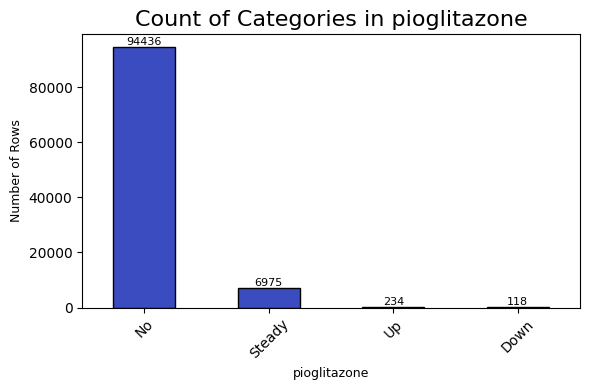

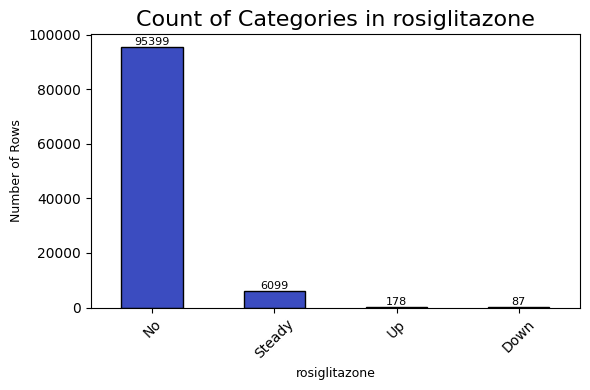

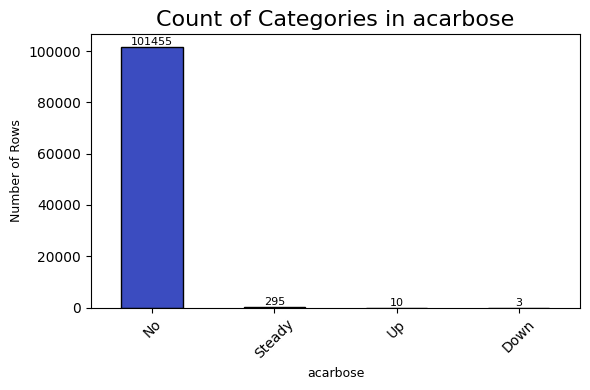

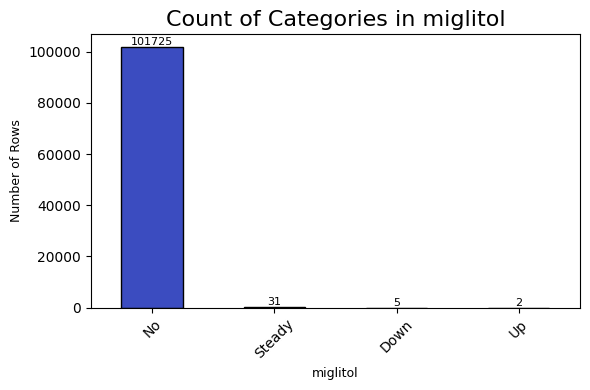

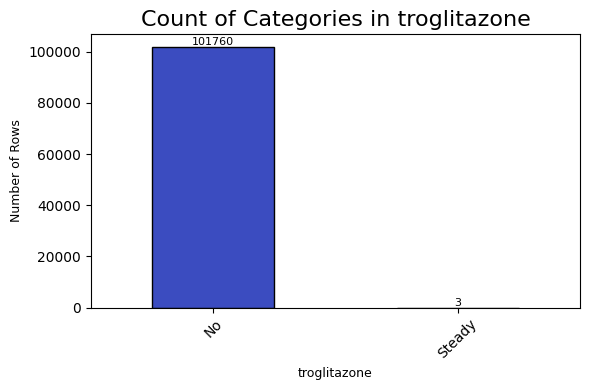

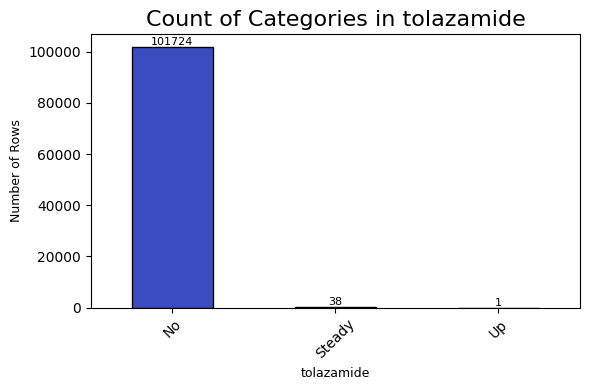

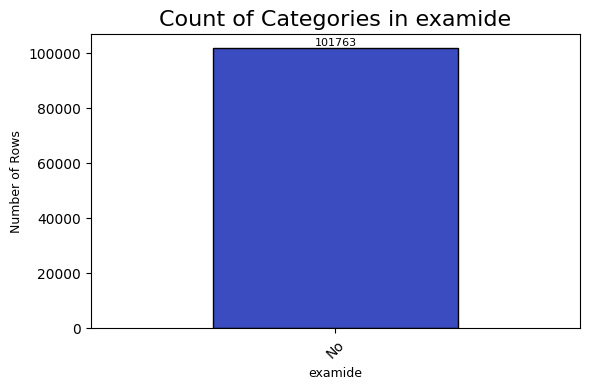

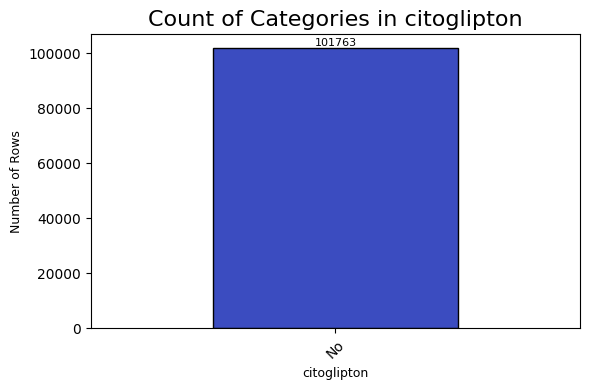

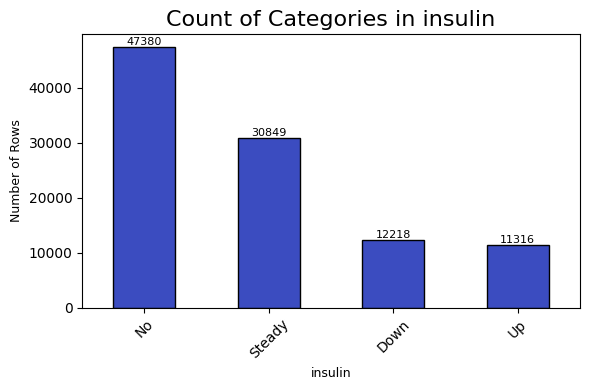

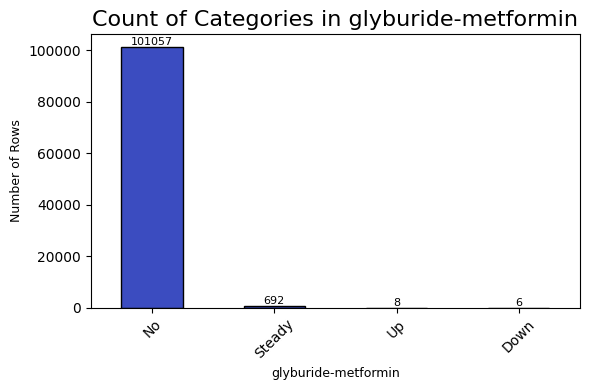

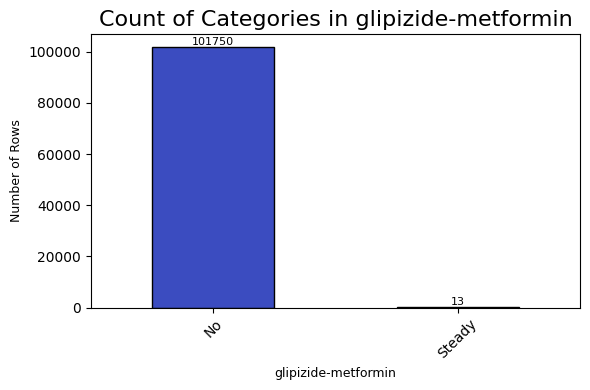

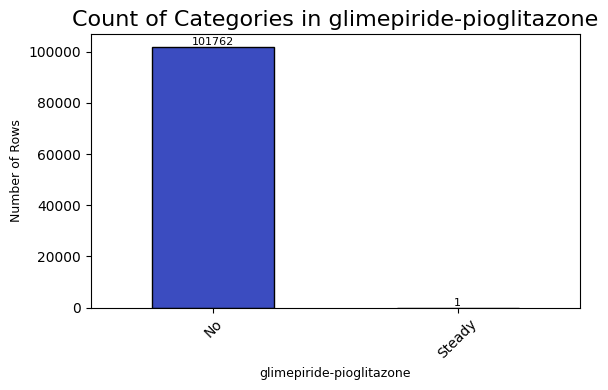

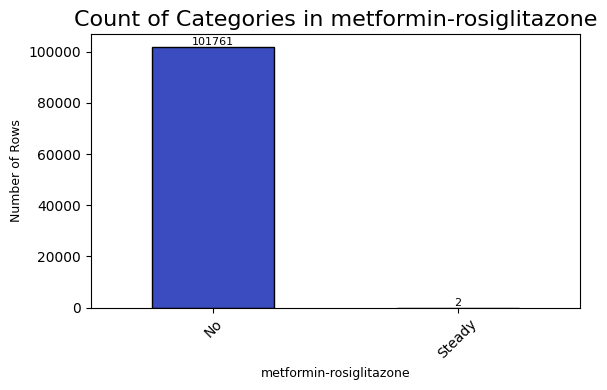

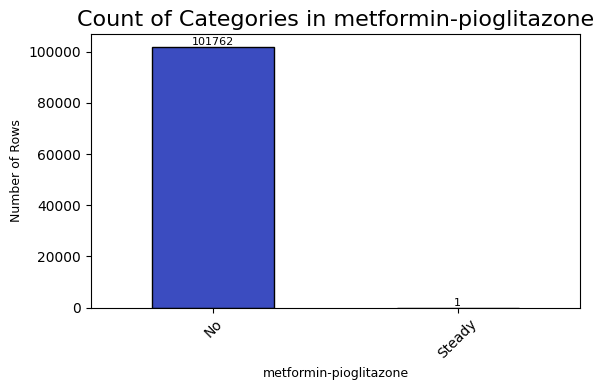

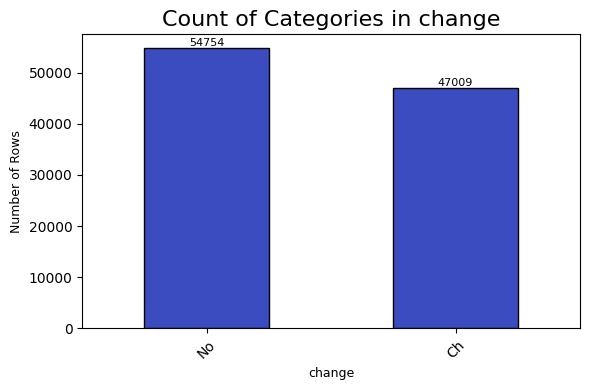

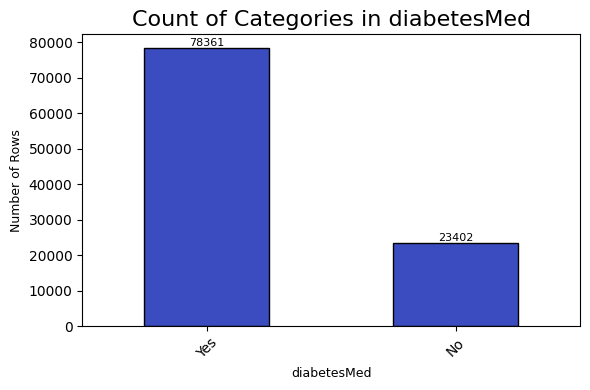

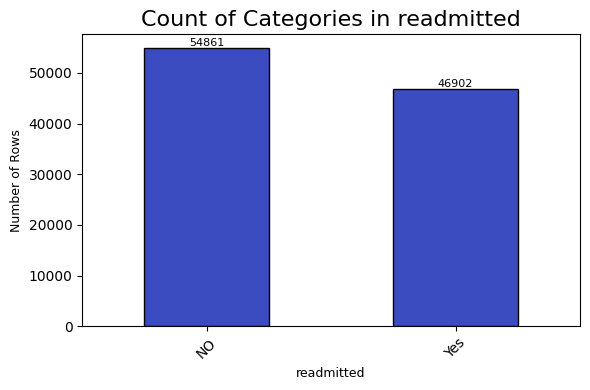

In [48]:
for column in df_cat.columns:
    plt.figure(figsize=(6, 4))
    df[column].value_counts().plot(kind='bar',colormap='coolwarm',edgecolor='black')
    plt.title(f'Count of Categories in {column}', fontsize=16)
    plt.xlabel(column, fontsize=9)
    plt.ylabel('Number of Rows', fontsize=9)
    
    for index, value in enumerate(df[column].value_counts()):
        plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

from above visualization ,we can remove following colums:
- nateglinide
- chlorpropamide
- glimepiride
- acetohexamide
- tolbutamide
- acarbose
- miglitol
- troglitazone
- tolazamide
- examide
- citoglipton
- glyburide-metformin
- glipizide-metformin
- glimepridie-pioglitazone
- metformin-rosiglitazone
- metformin-pioglitazone

In [49]:
df.drop(["nateglinide",
"chlorpropamide",
"glimepiride",
"acetohexamide",
"tolbutamide",
"acarbose",
"miglitol",
"troglitazone",
"tolazamide",
"examide",
"citoglipton",
"glyburide-metformin",
"glipizide-metformin",
"glimepiride-pioglitazone",
"metformin-rosiglitazone",
"metformin-pioglitazone"], axis=1, inplace=True)

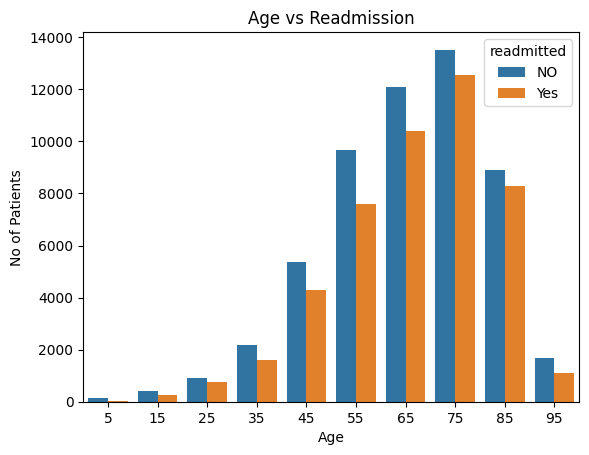

In [50]:
sns.countplot(data=df, x='age', hue='readmitted')
plt.title('Age vs Readmission')
plt.xlabel('Age')
plt.ylabel('No of Patients')
plt.show()


Patients with age group of 70-80 are high.

In [51]:
df_cat = df.select_dtypes(include=object)

In [52]:
len(df_cat.columns)

13

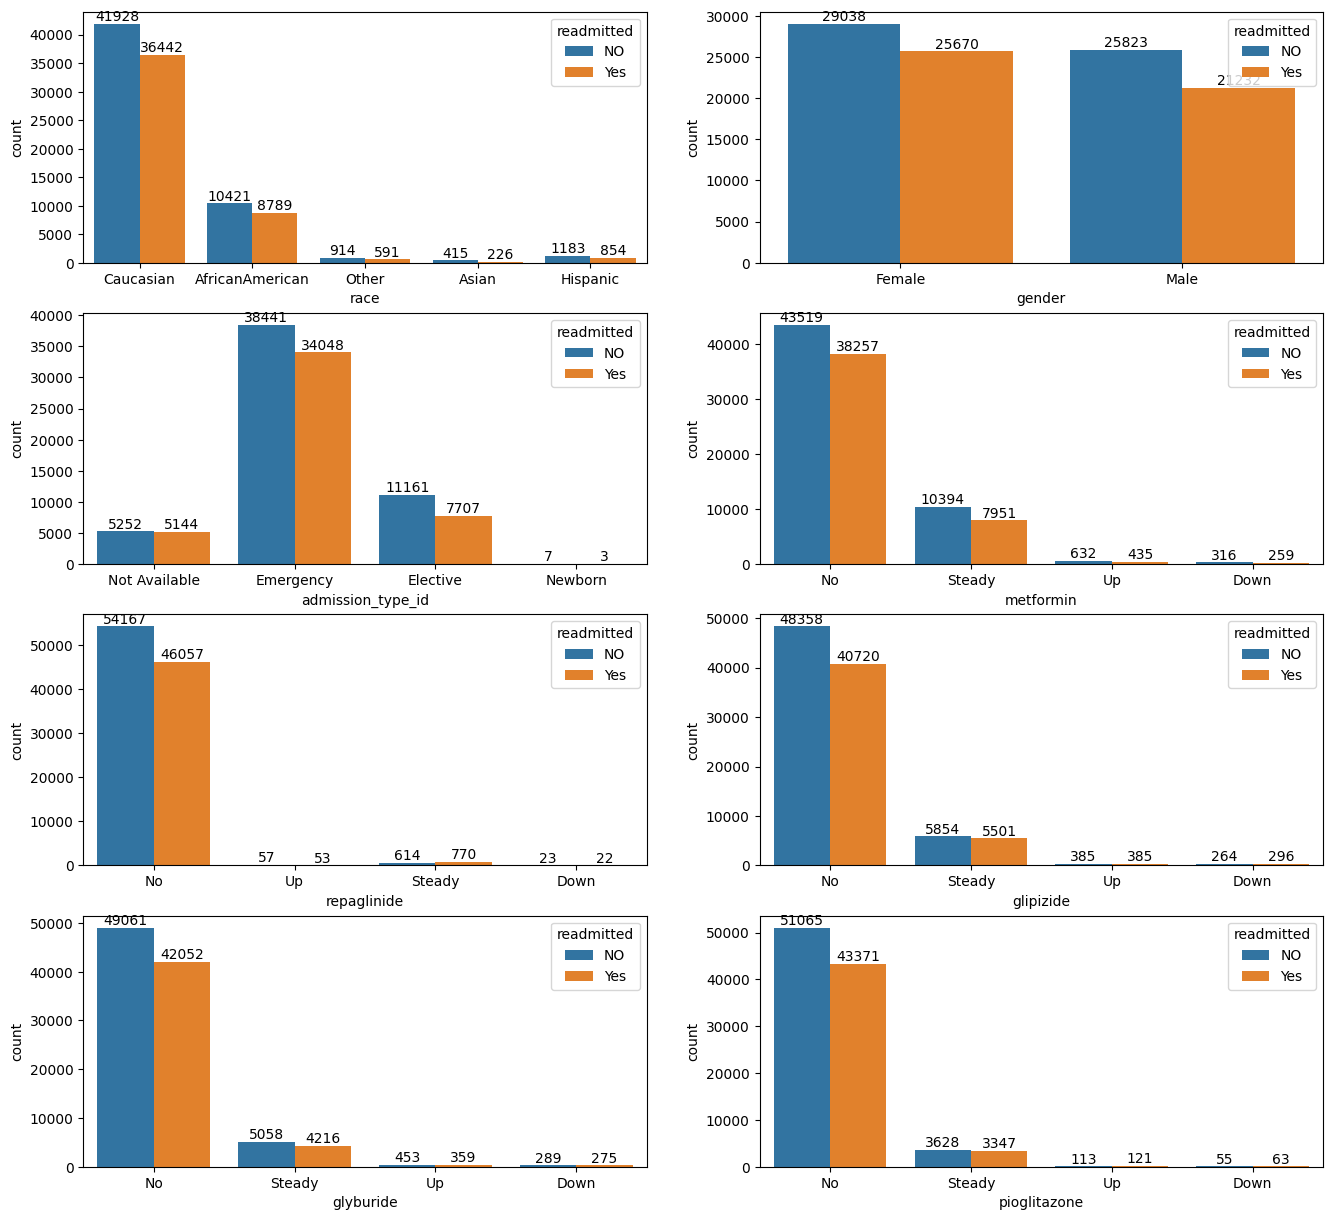

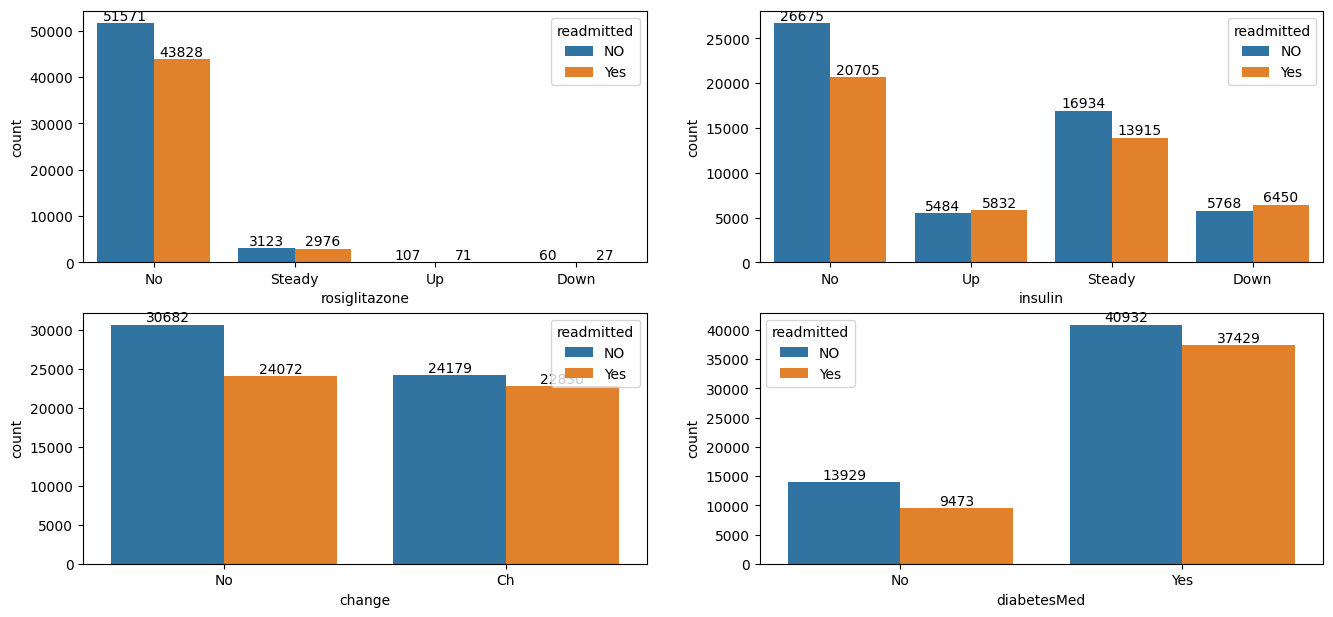

In [53]:

fig = plt.figure(figsize=(16,15))

for idx, col in list(enumerate(df_cat.columns))[:8]:
    if col == 'readmitted':
        continue 
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=df[col], hue=df["readmitted"], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="edge")
plt.show()

fig = plt.figure(figsize=(16,15))
for idx, col in list(enumerate(df_cat.columns))[8:]:
    # print(idx, col)
    if col == 'readmitted':
        continue 
    ax = plt.subplot(4, 2, idx+1-8)
    # group by readmitted
    sns.countplot(x=df[col], hue=df["readmitted"], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="edge")

In [54]:
maps = {}
for col in df_cat.columns:
    maps[col] = dict(zip(df[col].unique().tolist(), range(len(df[col].unique()))))
    print(maps[col])

{'Caucasian': 0, 'AfricanAmerican': 1, 'Other': 2, 'Asian': 3, 'Hispanic': 4}
{'Female': 0, 'Male': 1}
{'Not Available': 0, 'Emergency': 1, 'Elective': 2, 'Newborn': 3}
{'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
{'No': 0, 'Up': 1, 'Steady': 2, 'Down': 3}
{'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
{'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
{'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
{'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
{'No': 0, 'Up': 1, 'Steady': 2, 'Down': 3}
{'No': 0, 'Ch': 1}
{'No': 0, 'Yes': 1}
{'NO': 0, 'Yes': 1}


In [55]:
for col in df_cat.columns:
    df.replace({col: maps[col]}, inplace=True)

In [56]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_medications,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,service_utilization,procedures
0,0,0,5,0,25,1,1,1,1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,41
1,0,0,15,1,1,7,3,18,9,0.0,0.0,0,0,0,0,0,0,1,1,1,1,0,59
2,1,0,25,1,1,7,2,13,6,0.0,0.0,0,0,1,0,0,0,0,0,1,0,3,16
3,0,1,35,1,1,7,2,16,7,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,45
4,0,1,45,1,1,7,1,8,5,0.0,0.0,0,0,1,0,0,0,2,1,1,0,0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,1,1,75,1,3,7,3,16,9,0.0,2.0,1,0,0,0,0,0,3,1,1,1,0,51
101759,1,0,85,1,4,5,5,18,9,0.0,0.0,0,0,0,0,0,0,2,0,1,0,1,36
101760,0,1,75,1,1,7,1,9,13,0.0,0.0,1,0,0,0,0,0,3,1,1,0,1,53
101761,0,0,85,1,3,7,10,21,9,0.0,0.0,0,0,1,0,1,0,1,1,1,0,1,47


# Feature Extraction

In [57]:
df.to_csv('cleaned_data.csv', index=False)

In [58]:
df = pd.read_csv('cleaned_data.csv')

In [59]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_medications,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,service_utilization,procedures
0,0,0,5,0,25,1,1,1,1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,41
1,0,0,15,1,1,7,3,18,9,0.0,0.0,0,0,0,0,0,0,1,1,1,1,0,59
2,1,0,25,1,1,7,2,13,6,0.0,0.0,0,0,1,0,0,0,0,0,1,0,3,16
3,0,1,35,1,1,7,2,16,7,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,45
4,0,1,45,1,1,7,1,8,5,0.0,0.0,0,0,1,0,0,0,2,1,1,0,0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,1,1,75,1,3,7,3,16,9,0.0,2.0,1,0,0,0,0,0,3,1,1,1,0,51
101759,1,0,85,1,4,5,5,18,9,0.0,0.0,0,0,0,0,0,0,2,0,1,0,1,36
101760,0,1,75,1,1,7,1,9,13,0.0,0.0,1,0,0,0,0,0,3,1,1,0,1,53
101761,0,0,85,1,3,7,10,21,9,0.0,0.0,0,0,1,0,1,0,1,1,1,0,1,47


In [60]:
cor = df.corr()

In [61]:
selected_columns = cor[abs(cor) > 0.1].index
selected_columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_medications', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted',
       'service_utilization', 'procedures'],
      dtype='object')

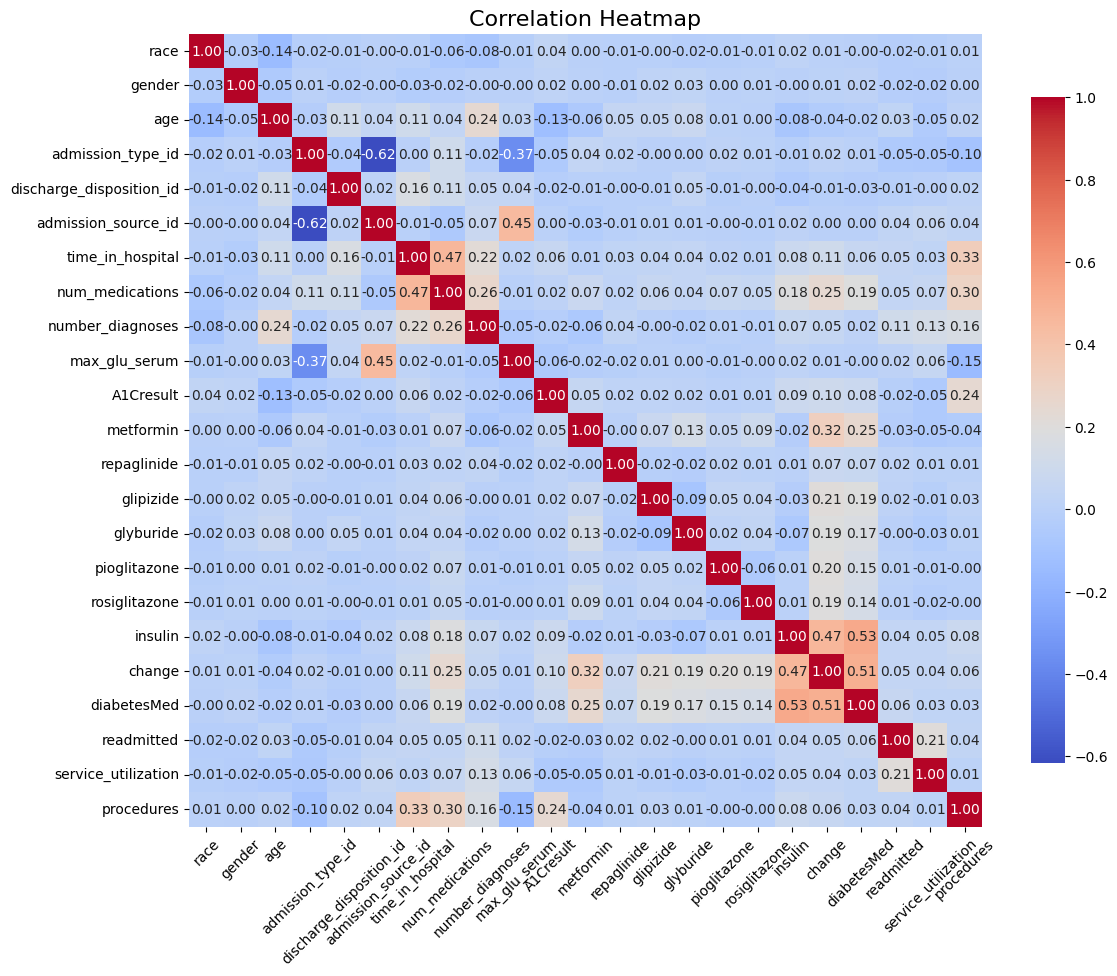

In [62]:
plt.figure(figsize=(12, 10))

sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

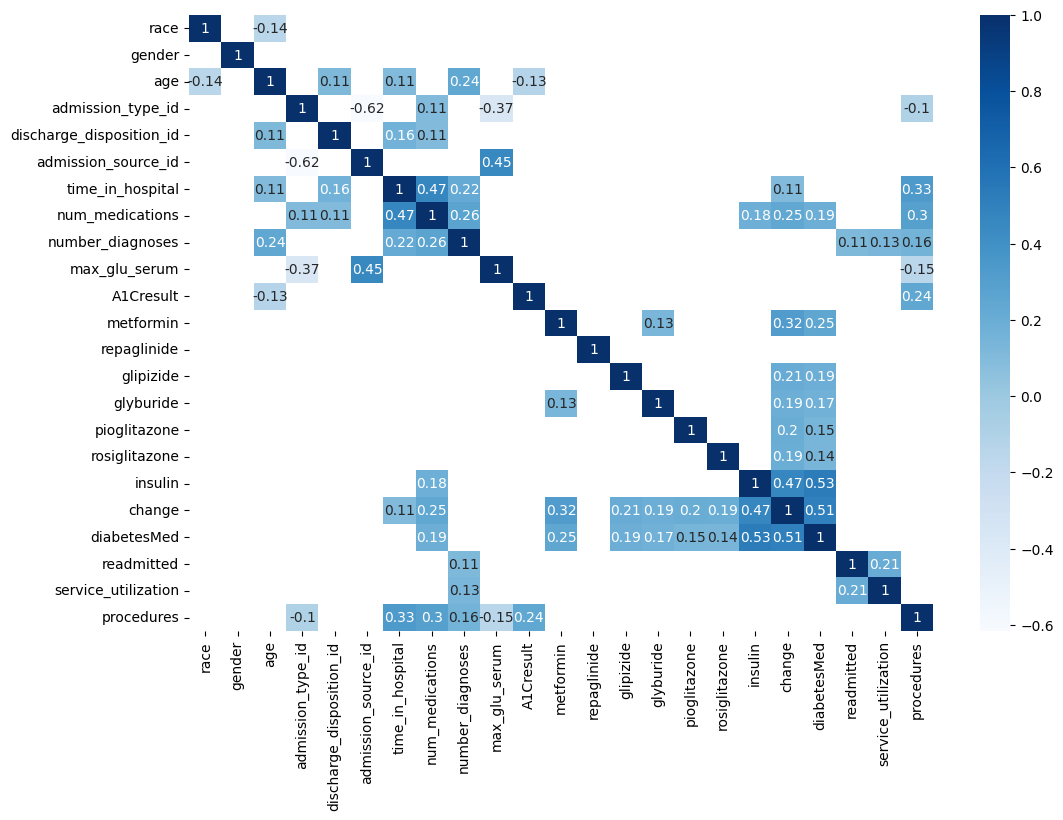

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(cor[abs(cor) > 0.1], annot=True, cmap="Blues")
plt.show()

In [64]:
target = 'readmitted'
corr_matrix = abs(cor[target])

# Select features with a threshold (e.g., > 0.1)
threshold = 0.05
selected_features = corr_matrix[corr_matrix > threshold]

print("Selected Features:")
print(selected_features)

Selected Features:
admission_type_id      0.050017
time_in_hospital       0.051281
number_diagnoses       0.112549
diabetesMed            0.061504
readmitted             1.000000
service_utilization    0.206916
Name: readmitted, dtype: float64


In [65]:
df = df[selected_features.index]

# Modelling

In [66]:
from sklearn.model_selection import train_test_split

X = df.drop('readmitted', axis=1)
y = df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(81410, 5) (20353, 5) (81410,) (20353,)


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))




Accuracy:  0.6147988011595342
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.74      0.68     11016
           1       0.60      0.46      0.53      9337

    accuracy                           0.61     20353
   macro avg       0.61      0.60      0.60     20353
weighted avg       0.61      0.61      0.61     20353

Confusion Matrix: 
 [[8179 2837]
 [5003 4334]]


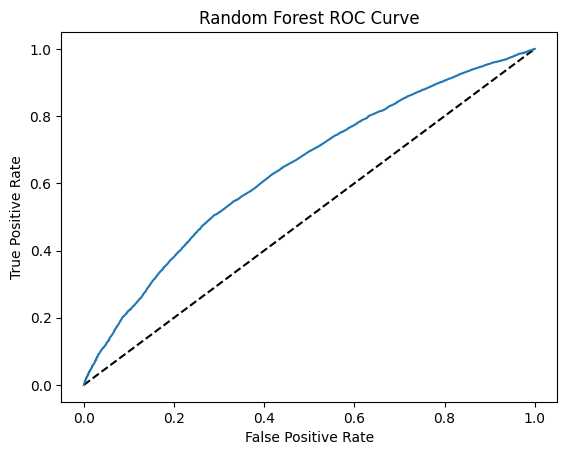

The roc score of the model is 0.6420096186146603


In [68]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

print(f"The roc score of the model is {roc_auc_score(y_test, y_pred_prob)}")

In [69]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


Accuracy:  0.5975040534564929
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.90      0.71     11016
           1       0.68      0.24      0.35      9337

    accuracy                           0.60     20353
   macro avg       0.63      0.57      0.53     20353
weighted avg       0.63      0.60      0.54     20353

Confusion Matrix: 
 [[9954 1062]
 [7130 2207]]


In [71]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


Accuracy:  0.6138161450400432
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.82      0.70     11016
           1       0.63      0.37      0.47      9337

    accuracy                           0.61     20353
   macro avg       0.62      0.60      0.58     20353
weighted avg       0.62      0.61      0.59     20353

Confusion Matrix: 
 [[8998 2018]
 [5842 3495]]


In [73]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


Accuracy:  0.6228565813393603
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.72      0.68     11016
           1       0.61      0.50      0.55      9337

    accuracy                           0.62     20353
   macro avg       0.62      0.61      0.61     20353
weighted avg       0.62      0.62      0.62     20353

Confusion Matrix: 
 [[7980 3036]
 [4640 4697]]


In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))



Accuracy:  0.5795705792757825
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.63      0.62     11016
           1       0.54      0.52      0.53      9337

    accuracy                           0.58     20353
   macro avg       0.58      0.57      0.57     20353
weighted avg       0.58      0.58      0.58     20353

Confusion Matrix: 
 [[6980 4036]
 [4521 4816]]


From above model accuracy the models taken for further steps are:
- Random Forest Classifier
- Gradient Boosting Classifier

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 4, 6, 8]}

rfc = RandomForestClassifier()
rfc_cv = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
rfc_cv.fit(X_train, y_train)

print("Best Parameters: ", rfc_cv.best_params_)
print("Best Score: ", rfc_cv.best_score_)
best_rfc = rfc_cv.best_estimator_
print("Best Estimator: ", rfc_cv.best_estimator_)



Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters:  {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.618572656921754
Best Estimator:  RandomForestClassifier(max_depth=7)


Accuracy:  0.6251166904141896
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.72      0.68     11016
           1       0.61      0.51      0.56      9337

    accuracy                           0.63     20353
   macro avg       0.62      0.62      0.62     20353
weighted avg       0.62      0.63      0.62     20353

Confusion Matrix: 
 [[7934 3082]
 [4548 4789]]


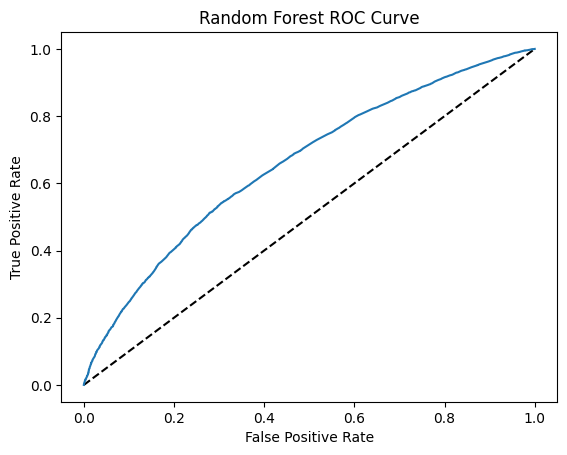

The roc score of the model is 0.6587714840318334


In [76]:
y_pred = best_rfc.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


y_pred_prob = best_rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

print(f"The roc score of the model is {roc_auc_score(y_test, y_pred_prob)}")

In [77]:

gbc = GradientBoostingClassifier()
param_grid = {'n_estimators': [50, 100, 150, 200],
              "learning_rate": [0.01, 0.1, 0.5, 1],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 4, 6, 8]}

gbc_cv = GridSearchCV(gbc, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
gbc_cv.fit(X_train, y_train)

print("Best Parameters: ", gbc_cv.best_params_)
print("Best Score: ",gbc_cv.best_score_)
best_gbc = gbc_cv.best_estimator_
print("Best Estimator: ", gbc_cv.best_estimator_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best Score:  0.6190025795356836
Best Estimator:  GradientBoostingClassifier(n_estimators=200)


Accuracy:  0.6216282611899966
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.72      0.67     11016
           1       0.61      0.50      0.55      9337

    accuracy                           0.62     20353
   macro avg       0.62      0.61      0.61     20353
weighted avg       0.62      0.62      0.62     20353

Confusion Matrix: 
 [[7963 3053]
 [4648 4689]]


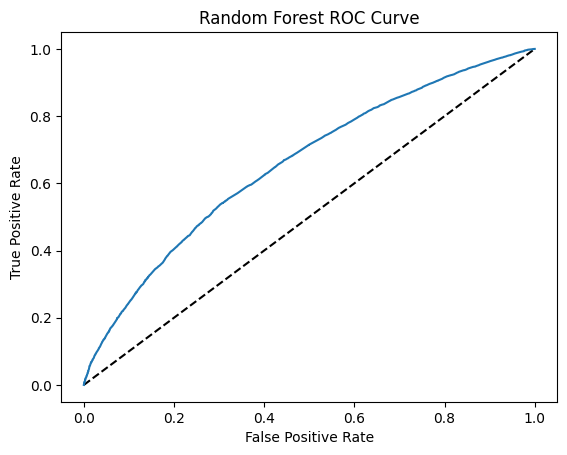

The roc score of the model is 0.6575881496990484


In [78]:
y_pred = best_gbc.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


y_pred_prob = best_gbc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

print(f"The roc score of the model is {roc_auc_score(y_test, y_pred_prob)}")

Hence the best model for the dataset is "Gradient Boosting Classifier" with the 
- Accuracy (62.16 %)
- ROC Value (0.657)